<h1>Exercise 1: Personalized Compliment Agent</h1>

### The Challenge
Time to put what you learned to the test! 

**Goal:** Build an agent that accepts a User's `name` and produces a personalized `compliment` for them.

**Requirements:**
1. Define a State dictionary with keys for `name` and `compliment`.
2. Create a node called `complimenterNode` that constructs the compliment string using the input name.
3. Build the graph with this single node.
4. Run it with your own name!

### The Solution
Let's walk through the solution step-by-step. If you tried it yourself, check your work against this!

### Step 1: Imports
As always, we start by importing `TypedDict` for our State definition and `StateGraph` for building the agent.

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

### Step 2: Define State & Node
We need a place to store our data. 
- `name`: Variable to store the user's input.
- `compliment`: Variable to store the generated output.

In [2]:
# 1. Define the State
class AgentState(TypedDict):
    name: str        # Input: The user's name
    compliment: str  # Output: The generated compliment

# 2. Define the Logic (Node)
def complimenterNode(state: AgentState) -> AgentState:
    """
    Takes the name of the user from the state and adds a nice compliment.
    """
    print(f"Processing compliment for: {state['name']}")
    
    # Standard python string concatenation or f-strings work here
    state["compliment"] = state["name"] + ", you're doing an amazing job learning LangGraph!"
    
    return state


### Step 3: Build the Graph
We create the graph, add our single node, and set it as the start and end point.

In [3]:
# Initialize graph with our custom state
graph = StateGraph(AgentState)

# Add the worker node
graph.add_node("complimenter", complimenterNode)

# Define the flow
graph.set_entry_point("complimenter") # Start at complimenter
graph.set_finish_point("complimenter") # Stop after complimenter

# Compile into a runnable app
app = graph.compile()

### Step 4: Visualize
Let's inspect the structure.

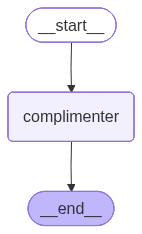

In [4]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

### Step 5: Run It
Pass in a name and see the result!

In [5]:
# Input data matching our AgentState structure
input_data = {"name": "Debu", "compliment": None}

# Invoke the app
result = app.invoke(input_data)

Processing compliment for: Debu


### The Output
Here is the result stored in our state.

In [6]:
print(result["compliment"])

Debu, you're doing an amazing job learning LangGraph!


### Explanation
1. **Input**: `{"name": "Debu"}` was passed to the graph.
2. **Processing**: `complimenterNode` read "Debu", created the string "Debu, you're doing an amazing job...", and saved it to `state["compliment"]`.
3. **Output**: The print statement above shows us the final value stored in the `compliment` key.